In [1]:
%pip install seaborn
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
#Converting the data from the dataset to a dataframe, simultaneously assigning species names to the numbers in the target column
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target']).astype({'target': int}).assign(species=lambda x: x['target'].map(dict(enumerate(iris['target_names']))))
#Printing column titles of the data in the dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [2]:
#Splitting the dataset into two parts, one to train the KNN model and the other to test the model on
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, df['species'], test_size = 0.1)
#Printing the length of the array X_train i.e. number of data items being used to train the model
len(X_train)

135

In [3]:
from sklearn.neighbors import KNeighborsClassifier

#Creating a KNN model to use 5 nearest neighbours (k = 3) and then training it
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [4]:
#Testing the model on the testing set and printing the score
knn.score(X_test, y_test)

0.9333333333333333

In [5]:
#Creating a confusion matrix to easily visualise the results
y_predicted = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[6, 0, 0],
       [0, 4, 1],
       [0, 0, 4]])

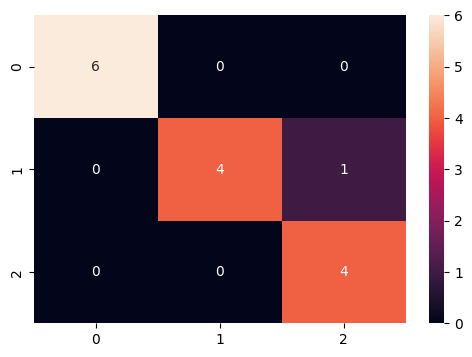

In [6]:
#Plotting the confusion matrix as a heatmap to compare the failed and successful test cases
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True)
plt.xlabel = 'Predicted'
plt.ylabel = 'Truth'

In [7]:
#Re-trying using a different value of k
knn2 = KNeighborsClassifier(n_neighbors=8)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [8]:
knn2.score(X_test, y_test)

0.8666666666666667

In [9]:
y_predicted = knn2.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[6, 0, 0],
       [0, 4, 1],
       [0, 1, 3]])

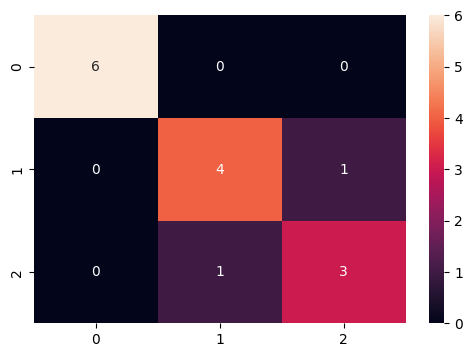

In [10]:
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True)
plt.xlabel = 'Predicted'
plt.ylabel = 'Truth'

In [11]:
#Re-trying using a larger test set
Xn_train, Xn_test, yn_train, yn_test = train_test_split(iris.data, df['species'], test_size = 0.3)
len(Xn_train)

105

In [12]:
knn3 = KNeighborsClassifier(n_neighbors=8)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [13]:
knn3.score(X_test, y_test)

0.8666666666666667

In [14]:
y_predicted = knn3.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[6, 0, 0],
       [0, 4, 1],
       [0, 1, 3]])

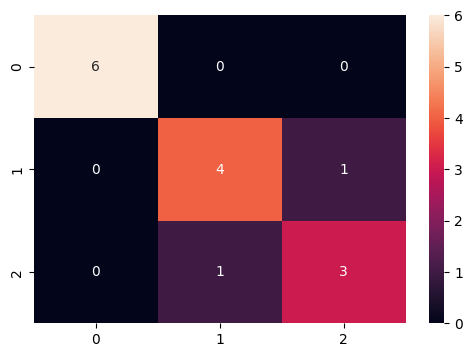

In [15]:
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True)
plt.xlabel = 'Predicted'
plt.ylabel = 'Truth'